In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Number of stops within 500 m for every pop dot

## London

In [2]:
l_nstops_500 = gpd.read_file('gen/l_nstops_500m.shp')

In [3]:
l_nstops_500

,counts,pop,geometry
0,4,8.504437,POINT (-40461.543 6725258.997)
1,5,20.988730,POINT (-13837.631 6721676.729)
2,4,7.002389,POINT (-51748.102 6710889.694)
3,4,6.471003,POINT (-11425.709 6700315.367)
4,3,7.777778,POINT (-46615.037 6702448.985)
...,...,...,...
23242,6,8.773323,POINT (-21135.242 6687327.221)
23243,8,6.483567,POINT (-40430.621 6699323.176)
23244,0,10.577734,POINT (-9075.631 6716952.537)
23245,3,6.223222,POINT (-17362.748 6694711.073)


<AxesSubplot:xlabel='pop', ylabel='counts'>

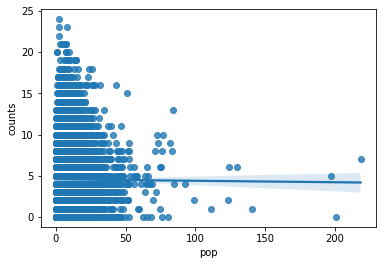

In [4]:
sns.regplot(data=l_nstops_500, x='pop', y='counts')

Don't use standard deviation to measure outliers because it is not normally distributed

In [5]:
l_nstops_500[['pop']].describe()

,pop
count,23247.000000
mean,8.654529
std,7.081964
min,0.163915
25%,4.772553
50%,7.145284
75%,10.609907
max,218.386390


In [6]:
l_q3 = l_nstops_500.quantile(0.75)
l_q1 = l_nstops_500.quantile(0.25)
l_iqr = l_q3 - l_q1
l_iqr

counts    4.000000
pop       5.837354
dtype: float64

In [7]:
l_high = l_q3 + 1.5*l_iqr
l_low = l_q1 - 1.5*l_iqr

In [8]:
l_low

counts   -4.000000
pop      -3.983477
dtype: float64

In [9]:
high_pop_normal_count = l_nstops_500[
    (l_nstops_500['pop'] >= l_high['pop']) & (l_nstops_500['counts'] <= l_high['counts'])
]

In [10]:
normal_pop_high_count = l_nstops_500[
    (l_nstops_500['pop'] <= l_high['pop']) & (l_nstops_500['counts'] >= l_high['counts'])
]

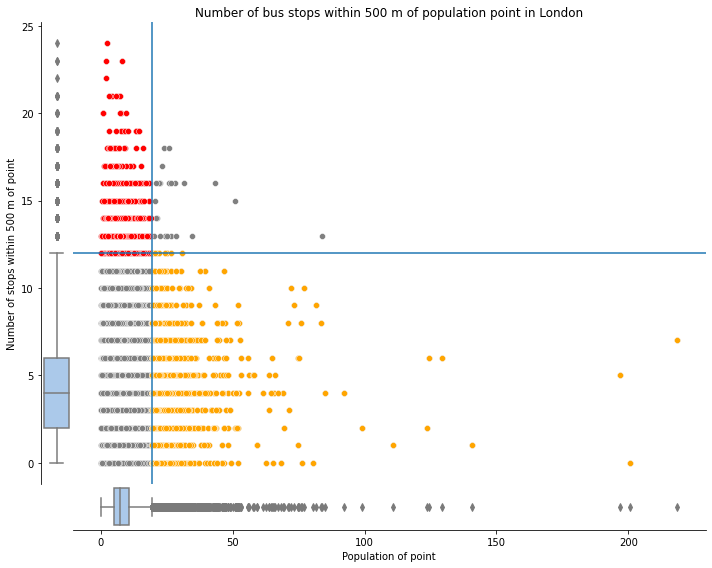

In [11]:
_, axes = plt.subplots(2, 2, figsize=(10,8), sharex='col', sharey='row',
                      gridspec_kw={'height_ratios': [10, 1], 'width_ratios': [1, 20], 'hspace': 0,
                                  'wspace': 0})

axes[1, 0].set_axis_off()

ax = axes[0, 1]

sns.scatterplot(data=l_nstops_500, x='pop', y='counts', color='grey', ax=ax)
sns.scatterplot(data=normal_pop_high_count, x='pop', y='counts', color='red', ax=ax)
sns.scatterplot(data=high_pop_normal_count, x='pop', y='counts', color='orange', ax=ax)

ax.axvline(x=l_high['pop'])
ax.axhline(y=l_high['counts'])

if l_low['pop'] > 0:
    ax.axvline(x=l_low['pop'])
    
if l_low['counts'] > 0:
    ax.axhline(y=l_low['counts'])

ax.set_title('Number of bus stops within 500 m of population point in London')
ax.axis('off')

ax = axes[0, 0]
sns.boxplot(data=l_nstops_500, y='counts', ax=ax, palette='pastel')
ax.set_ylabel('Number of stops within 500 m of point')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

ax = axes[1, 1]
sns.boxplot(data=l_nstops_500, x='pop', ax=ax, palette='pastel')
ax.set_xlabel('Population of point')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

plt.tight_layout()
plt.savefig('figures/l_nstops_500.png')

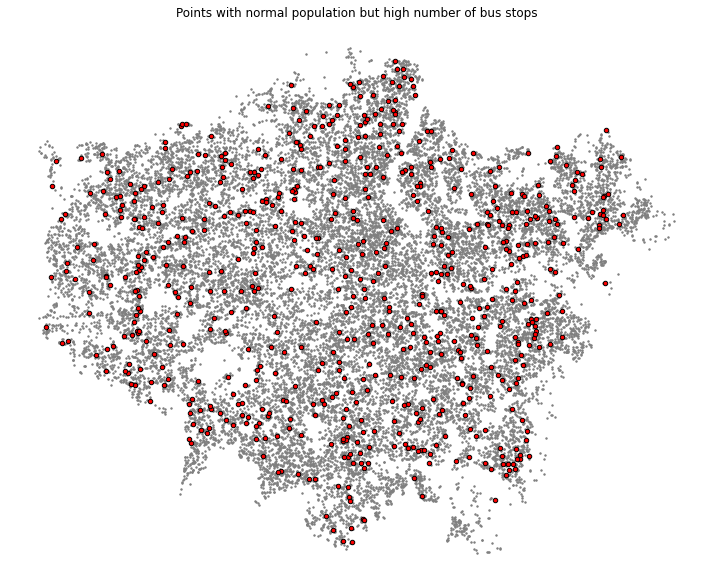

In [12]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
normal_pop_high_count.plot(color='red', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with normal population but high number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_normal_pop_high_count.png')

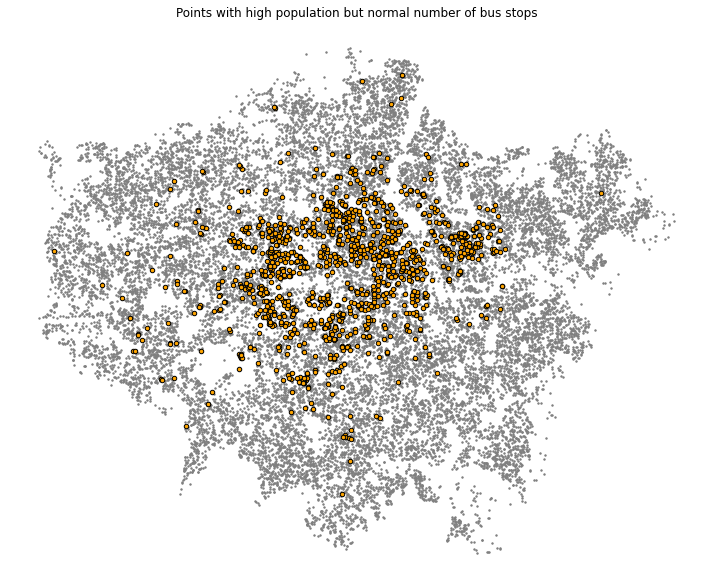

In [13]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
high_pop_normal_count.plot(color='orange', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with high population but normal number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_high_pop_normal_count.png')

In [14]:
high_pop_normal_count.to_file('gen/l_high_pop_normal_count.shp')

## HK

In [14]:
hk_nstops_500 = gpd.read_file('gen/hk_nstops_500m.shp')

<AxesSubplot:xlabel='pop', ylabel='counts'>

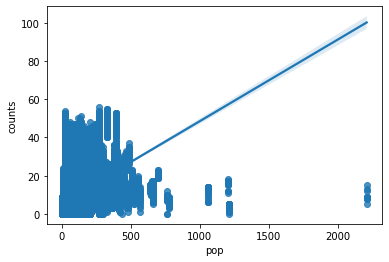

In [15]:
sns.regplot(data=hk_nstops_500, x='pop', y='counts')

Don't use standard deviation to measure outliers because it is not normally distributed

In [16]:
hk_nstops_500[['pop']].describe()

,pop
count,109955.000000
mean,68.729750
std,98.623602
min,4.752405
25%,9.466492
50%,22.156915
75%,95.806186
max,2211.049633


In [17]:
hk_q3 = hk_nstops_500.quantile(0.75)
hk_q1 = hk_nstops_500.quantile(0.25)
hk_iqr = hk_q3 - hk_q1
hk_iqr

pop       86.339695
counts    12.000000
dtype: float64

In [18]:
hk_high = hk_q3 + 1.5*hk_iqr
hk_low = hk_q1 - 1.5*hk_iqr

In [19]:
hk_low

pop      -120.04305
counts    -16.00000
dtype: float64

In [20]:
high_pop_normal_count = hk_nstops_500[
    (hk_nstops_500['pop'] >= hk_high['pop']) & (hk_nstops_500['counts'] <= hk_high['counts'])
]

In [21]:
normal_pop_high_count = hk_nstops_500[
    (hk_nstops_500['pop'] <= hk_high['pop']) & (hk_nstops_500['counts'] >= hk_high['counts'])
]

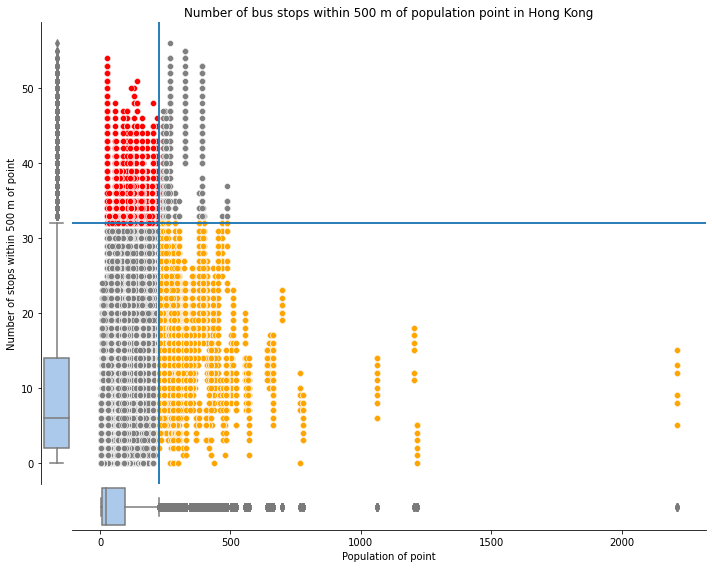

In [22]:
_, axes = plt.subplots(2, 2, figsize=(10,8), sharex='col', sharey='row',
                      gridspec_kw={'height_ratios': [10, 1], 'width_ratios': [1, 20], 'hspace': 0,
                                  'wspace': 0})

axes[1, 0].set_axis_off()

ax = axes[0, 1]

sns.scatterplot(data=hk_nstops_500, x='pop', y='counts', color='grey', ax=ax)
sns.scatterplot(data=normal_pop_high_count, x='pop', y='counts', color='red', ax=ax)
sns.scatterplot(data=high_pop_normal_count, x='pop', y='counts', color='orange', ax=ax)

ax.axvline(x=hk_high['pop'])
ax.axhline(y=hk_high['counts'])

if hk_high['pop'] > 0:
    ax.axvline(x=hk_high['pop'])
    
if hk_high['counts'] > 0:
    ax.axhline(y=hk_high['counts'])

ax.set_title('Number of bus stops within 500 m of population point in Hong Kong')
ax.axis('off')

ax = axes[0, 0]
sns.boxplot(data=hk_nstops_500, y='counts', ax=ax, palette='pastel')
ax.set_ylabel('Number of stops within 500 m of point')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

ax = axes[1, 1]
sns.boxplot(data=hk_nstops_500, x='pop', ax=ax, palette='pastel')
ax.set_xlabel('Population of point')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

plt.tight_layout()
plt.savefig('figures/hk_nstops_500.png')

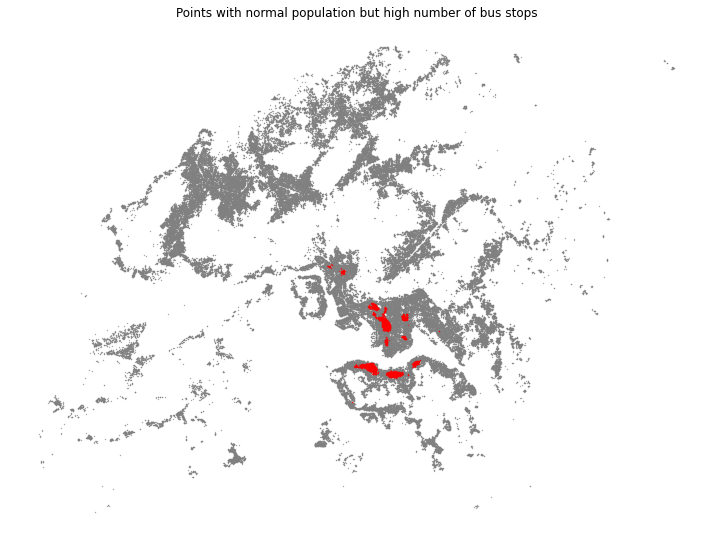

In [23]:
_, ax = plt.subplots(figsize=(10,10))
hk_nstops_500.plot(color='grey', markersize=0.1, ax=ax)
normal_pop_high_count.plot(color='red', markersize=0.1, ax=ax)
plt.axis('off')
plt.title('Points with normal population but high number of bus stops')
plt.tight_layout()
plt.savefig('figures/hk_normal_pop_high_count.png')

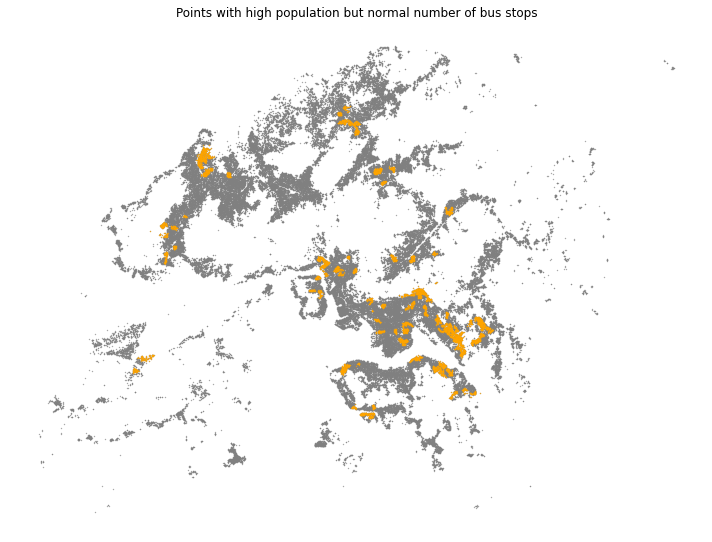

In [24]:
_, ax = plt.subplots(figsize=(10,10))
hk_nstops_500.plot(color='grey', markersize=0.1, ax=ax)
high_pop_normal_count.plot(color='orange', markersize=0.1, ax=ax)
plt.axis('off')
plt.title('Points with high population but normal number of bus stops')
plt.tight_layout()
plt.savefig('figures/hk_high_pop_normal_count.png')

# Number of stops within 1000 m for every pop dot

## London

In [ ]:
l_nstops_1000 = gpd.read_file('gen/l_nstops_1000m.shp')

In [ ]:
l_nstops_1000

In [ ]:
sns.regplot(data=l_nstops_1000, x='pop', y='counts')

Don't use standard deviation to measure outliers because it is not normally distributed

In [ ]:
l_nstops_1000.describe()

In [ ]:
l_q3 = l_nstops_1000.quantile(0.75)
l_q1 = l_nstops_1000.quantile(0.25)
l_iqr = l_q3 - l_q1
l_iqr

In [ ]:
l_high = l_q3 + 1.5*l_iqr
l_low = l_q1 - 1.5*l_iqr

In [ ]:
l_high

In [ ]:
l_low

In [ ]:
high_pop_normal_count = l_nstops_1000[
    (l_nstops_1000['pop'] >= l_high['pop']) & (l_nstops_1000['counts'] <= l_high['counts'])
]

In [ ]:
normal_pop_high_count = l_nstops_1000[
    (l_nstops_1000['pop'] <= l_high['pop']) & (l_nstops_1000['counts'] >= l_high['counts'])
]

In [ ]:
_, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=l_nstops_1000, x='pop', y='counts', color='grey', ax=ax)
sns.scatterplot(data=normal_pop_high_count, x='pop', y='counts', color='red')
sns.scatterplot(data=high_pop_normal_count, x='pop', y='counts', color='orange')

ax.axvline(x=l_high['pop'])
ax.axhline(y=l_high['counts'])

if l_low['pop'] > 0:
    ax.axvline(x=l_low['pop'])
    
if l_low['counts'] > 0:
    ax.axhline(y=l_low['counts'])

plt.title('Number of bus stops within 1000 m of population point in London')
plt.xlabel('Population of point')
plt.ylabel('Number of stops within 1000 m of point')
plt.tight_layout()
plt.savefig('figures/l_nstops_1000.png')

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
normal_pop_high_count.plot(color='red', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with normal population but high number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_normal_pop_high_count_1000.png')

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
high_pop_normal_count.plot(color='orange', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with high population but normal number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_high_pop_normal_count_1000.png')

# Number of stops within 100 m for every pop dot

## London

In [ ]:
l_nstops_100 = gpd.read_file('gen/l_nstops_100m.shp')

In [ ]:
l_nstops_100

In [ ]:
sns.regplot(data=l_nstops_100, x='pop', y='counts')

Don't use standard deviation to measure outliers because it is not normally distributed

In [ ]:
l_nstops_100.describe()

In [ ]:
l_q3 = l_nstops_100.quantile(0.75)
l_q1 = l_nstops_100.quantile(0.25)
l_iqr = l_q3 - l_q1
l_iqr

In [ ]:
l_high = l_q3 + 1.5*l_iqr
l_low = l_q1 - 1.5*l_iqr

In [ ]:
l_high

In [ ]:
l_high['counts'] = 1

In [ ]:
l_low

In [ ]:
high_pop_normal_count = l_nstops_100[
    (l_nstops_100['pop'] >= l_high['pop']) & (l_nstops_100['counts'] <= l_high['counts'])
]

In [ ]:
normal_pop_high_count = l_nstops_100[
    (l_nstops_100['pop'] <= l_high['pop']) & (l_nstops_100['counts'] >= l_high['counts'])
]

In [ ]:
_, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=l_nstops_100, x='pop', y='counts', color='grey', ax=ax)
sns.scatterplot(data=normal_pop_high_count, x='pop', y='counts', color='red')
sns.scatterplot(data=high_pop_normal_count, x='pop', y='counts', color='orange')

ax.axvline(x=l_high['pop'])
ax.axhline(y=l_high['counts'])

if l_low['pop'] > 0:
    ax.axvline(x=l_low['pop'])
    
if l_low['counts'] > 0:
    ax.axhline(y=l_low['counts'])

plt.title('Number of bus stops within 100 m of population point in London')
plt.xlabel('Population of point')
plt.ylabel('Number of stops within 100 m of point')
plt.tight_layout()
plt.savefig('figures/l_nstops_100.png')

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
normal_pop_high_count.plot(color='red', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with normal population but high number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_normal_pop_high_count_100.png')

In [ ]:
_, ax = plt.subplots(figsize=(10,10))
l_nstops_500.plot(color='grey', markersize=2, ax=ax)
high_pop_normal_count.plot(color='orange', markersize=20, ax=ax, linewidth=1, edgecolor='black')
plt.axis('off')
plt.title('Points with high population but normal number of bus stops')
plt.tight_layout()
plt.savefig('figures/l_high_pop_normal_count_100.png')